<a href="https://colab.research.google.com/github/peguescj/data-management/blob/main/PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aok: have sections like this

# big sec
## smaller sec


In [ ]:
#aok: typo in file name: should be ".ipynb" not "ipynb"--forgot dot "."

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

PS2 Submission
Data Sources and explainations within this linked doc
https://docs.google.com/document/d/1UtEePRrVqUHWjPAYSCcnqK9rabKoOY9U-yETtrxUfuk/edit?usp=sharing
aok: need to make it public first

In [2]:
#Uploading the NJ Per Pupil Expenditure Data as a CSV.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1HCCdqd0pEMFDnBSAjlQ-AULTGKQpbM1P&export=download", "PerPupil.csv")
!wget -q -O PerPupil.csv https://docs.google.com/uc?id=1HCCdqd0pEMFDnBSAjlQ-AULTGKQpbM1P&export=download

In [3]:
# basic navigation
#wd =  'PerPupil'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
PerPupil.csv  sample_data


In [4]:
dat=pd.read_csv('PerPupil.csv') #read it in  ; or full path: '/content/final_data.csv'

In [5]:
dat.columns #list var names

Index(['county_id', 'coname', 'district_id', 'distname', 'line_desc', 'year1',
       'year2', 'year3', 'year4', 'year5'],
      dtype='object')

In [6]:
dat["year1"][0:50] #How much the school spent money in 2016
#aok yea good to have a look, but could be more meaningful if list along with some meaningful name like school name etc

0     $11,318 
1      $7,550 
2      $7,202 
3        $264 
4         $84 
5      $1,277 
6      $1,103 
7      $1,262 
8      $1,062 
9      $1,164 
10       $635 
11         $0 
12        $55 
13         $0 
14        $20 
15      30.63%
16    $19,422 
17    $12,021 
18    $11,376 
19       $424 
20       $220 
21     $2,864 
22     $2,605 
23     $1,602 
24     $1,290 
25     $2,644 
26     $1,477 
27         $0 
28       $235 
29        $32 
30       $111 
31      33.45%
32    $11,998 
33     $6,343 
34     $5,909 
35       $382 
36        $52 
37     $1,397 
38     $1,299 
39     $1,197 
40       $863 
41     $2,533 
42     $1,292 
43         $0 
44       $292 
45       $161 
46        $22 
47      33.44%
48    $49,255 
49    $28,329 
Name: year1, dtype: object

In [ ]:
#Looking to see if the total cost is static over years
#Seems like previous years spending is a good indicator of next years - Is there a built in way to regress in python?
#aok: yes:
#https://github.com/theaok/vis/blob/main/ols.ipynb
dat[["year1","year2", "year3"]][0:50] #aok: good;
#can also subset at the very begiing after loading
#the data to make things easier from the begining

year1     year2     year3
0   $11,318   $11,148   $11,731 
1    $7,550    $7,465    $7,937 
2    $7,202    $7,218    $7,693 
3      $264      $192      $158 
4       $84       $56       $86 
5    $1,277    $1,235    $1,201 
6    $1,103    $1,045    $1,004 
7    $1,262    $1,276    $1,345 
8    $1,062    $1,083    $1,093 
9    $1,164    $1,117    $1,184 
10     $635      $633      $656 
11       $0        $0        $0 
12      $55       $53       $54 
13       $0       $14        $0 
14      $20       $17       $17 
15    30.63%    31.14%    33.65%
16  $19,422   $16,594   $18,288 
17  $12,021   $10,830   $11,615 
18  $11,376   $10,520   $11,046 
19     $424      $131      $370 
20     $220      $179      $198 
21   $2,864    $1,974    $2,040 
22   $2,605    $1,780    $1,757 
23   $1,602    $1,584    $1,727 
24   $1,290    $1,314    $1,365 
25   $2,644    $2,085    $2,688 
26   $1,477    $1,245    $1,386 
27       $0        $0        $0 
28     $235      $102      $166 
29      $32       $36       $73 
30     $111       $65       $97 
31    33.45%    35.48%    35.17%
32  $11,998   $11,951   $13,552 
33   $6,343    $6,282    $7,243 
34   $5,909    $5,862    $6,650 
35     $382      $298      $384 
36      $52      $121      $209 
37   $1,397    $1,430    $1,591 
38   $1,299    $1,325    $1,466 
39   $1,197    $1,236    $1,471 
40     $863      $870    $1,041 
41   $2,533    $2,459    $2,659 
42   $1,292    $1,287    $1,372 
43       $0        $0        $0 
44     $292      $303      $346 
45     $161       $95       $46 
46      $22       $23       $25 
47    33.44%    35.04%    39.21%
48  $49,255   $48,544   $54,172 
49  $28,329   $27,388   $30,393

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='year2', ylabel='year1'>

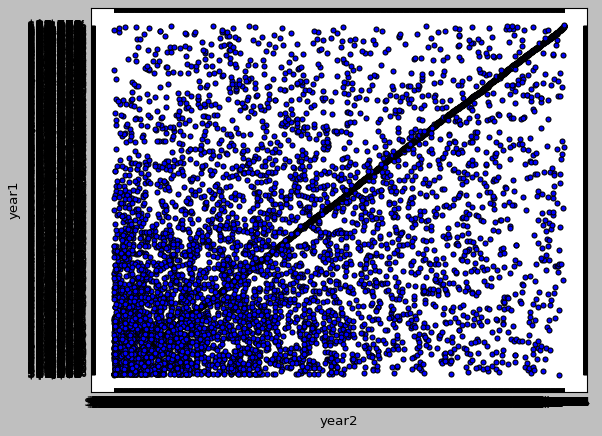

In [7]:
#Scatter plot to visualize the above a bit better
dat.plot(kind='scatter', y='year1', x='year2')
#aok: dataset is huge, again would be easier if subset at the beginning, say take random sample:
#https://www.google.com/search?q=pandas+take+random+sample+of+rows&rlz=1C1GCEA_enUS1082US1082&oq=pandas+take+ran&gs_lcrp=EgZjaHJvbWUqBwgAEAAYgAQyBwgAEAAYgAQyBggBEEUYOTIHCAIQABiABDIICAMQABgWGB4yCAgEEAAYFhgeMggIBRAAGBYYHjIICAYQABgWGB4yCAgHEAAYFhgeMggICBAAGBYYHjIICAkQABgWGB7SAQg0NDE1ajBqN6gCALACAA&sourceid=chrome&ie=UTF-8

Realized after I ran it that a scatterplot is not useful for this dataset unless you've manipulated the data onto more interesting variables. Whoops!

In [8]:
#Uploading the NJ Median Income and Populations by County - ideally to compare with Per Pupil spending when we merge
#UGLY - Includes NJ and USA as a whole ALPHABETICALLY in the chart, not at the bottom or top.
#Is there a way to cull specific entires? I assume there's a simple drop command by variable number. In this case we could
#clear it by dropping all variables with no "Rank" as USA and NJ totals were skipped.
pd.read_html('https://en.wikipedia.org/wiki/List_of_New_Jersey_locations_by_per_capita_income',match='Population',flavor=None)[0].head(22)

Rank         County Per capita income Median household income  \
0    1.0      Hunterdon           $48,489                $100,980   
1    2.0         Morris           $47,342                 $96,747   
2    3.0       Somerset           $47,067                 $97,440   
3    4.0         Bergen           $42,006                 $81,708   
4    5.0       Monmouth           $40,976                 $82,265   
5    6.0         Mercer           $36,016                 $71,217   
6    7.0         Sussex           $35,982                 $83,089   
7    NaN     New Jersey           $34,858                 $69,811   
8    8.0     Burlington           $34,802                 $76,258   
9    9.0          Union           $34,096                 $66,791   
10  10.0       Cape May           $33,571                 $54,292   
11  11.0      Middlesex           $33,289                 $77,615   
12  12.0         Warren           $32,985                 $71,364   
13  13.0          Essex           $31,535                 $55,125   
14  14.0     Gloucester           $31,210                 $72,664   
15  15.0         Hudson           $31,024                 $55,275   
16  16.0          Ocean           $29,826                 $59,620   
17  17.0         Camden           $29,478                 $60,976   
18   NaN  United States           $27,334                 $51,914   
19  18.0          Salem           $27,296                 $59,441   
20  19.0       Atlantic           $27,247                 $54,766   
21  20.0        Passaic           $26,095                 $54,944   

   Median family income  Population  Number of households  
0              $121,166      128349                 47169  
1              $114,694      492276                180534  
2              $115,214      323444                117759  
3              $100,310      905116                335730  
4              $102,074      630380                233983  
5               $88,694      366513                133155  
6               $93,701      149265                 54752  
7               $84,904     8791894               3214360  
8               $91,185      448734                166318  
9               $80,818      536499                188118  
10              $69,978       97265                 40812  
11              $91,543      809858                281186  
12              $85,635      108692                 41480  
13              $68,683      783969                283712  
14              $85,832      288288                104271  
15              $58,968      634266                246437  
16              $73,672      576567                221111  
17              $74,385      513657                190980  
18              $62,982   308745538             116716292  
19              $72,537       66083                 25290  
20              $66,920      274549                102847  
21              $67,208      501226                166785

In [9]:
#Uploading the Nj Graduation Rate by category as an xlsv - in future I have versions of these that are split in a more useful manner
#Base document is near unusable in how it coded the attributes - has all of the different categories listed next to one another
#so they're all interpreted under the same variable as one another
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1g168RZqCUj3aujXJP2CEssnLHBmYbDQw&export=download ", "GradRate.xlsv")
!wget -q -O GradRate.xlsv https://docs.google.com/uc?id=1g168RZqCUj3aujXJP2CEssnLHBmYbDQw&export=download

In [10]:
# basic navigation
#wd =  'PerPupil'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
GradRate.xlsv  PerPupil.csv  sample_data


In [11]:
dat=pd.read_excel('GradRate.xlsv') #read it in  ; or full path: '/content/GradRate.xlsv'

In [12]:
dat.columns #list var names

Index(['County Code', 'County Name', 'District Code', 'District Name',
       'School Code', 'School Name', 'Student Group', 'Graduation Rate',
       'Cohort Count', 'Graduated'],
      dtype='object')

In [13]:
dat["Graduation Rate"][0:50] #Pulling up all of the grad rates - base is not useful as it has "All" "Female" "Male" in same line
#Have version from last year that I've applied changes too - curious if python can help do those for me so just using base

0         N
1         *
2      77.5
3      79.9
4      58.8
5      86.3
6      80.2
7         *
8      75.0
9         N
10        *
11        N
12        N
13     67.6
14     79.8
15        *
16        *
17        N
18    100.0
19     92.7
20     89.9
21        *
22     94.6
23     87.5
24        *
25     89.4
26        N
27        *
28        N
29        *
30     86.6
31     91.9
32        *
33     91.0
34        N
35        N
36     73.1
37     82.1
38        N
39     79.2
40     94.1
41        *
42     85.0
43        N
44        *
45        N
46        N
47     90.0
48     81.8
49        N
Name: Graduation Rate, dtype: object

In [14]:
#let's show off the problem I mentioned
#all different groups on the same line for grad rate - Have to splice them into seperate lines to compare!
#Did manually before - must be way to automate it.
dat[["Graduation Rate","Cohort Count", "Student Group"]][0:50]

Graduation Rate Cohort Count                                Student Group
0                N            N             American Indian or Alaska Native
1                *            *  Asian, Native Hawaiian, or Pacific Islander
2             77.5           71                    Black or African American
3             79.9          139          Economically Disadvantaged Students
4             58.8           17                             English Learners
5             86.3           73                                       Female
6             80.2           86                                     Hispanic
7                *            *                            Homeless Students
8             75.0          100                                         Male
9                N            N                             Migrant Students
10               *            *                  Military-Connected Students
11               N            N               Non-Binary/Undesignated Gender
12               N            N                      Students in Foster Care
13            67.6           34                   Students with Disabilities
14            79.8          173                                        Total
15               *            *                            Two or More Races
16               *            *                                        White
17               N            N             American Indian or Alaska Native
18           100.0            *  Asian, Native Hawaiian, or Pacific Islander
19            92.7           55                    Black or African American
20            89.9          149          Economically Disadvantaged Students
21               *            *                             English Learners
22            94.6          130                                       Female
23            87.5           56                                     Hispanic
24               *            *                            Homeless Students
25            89.4          142                                         Male
26               N            N                             Migrant Students
27               *            *                  Military-Connected Students
28               N            N               Non-Binary/Undesignated Gender
29               *            *                      Students in Foster Care
30            86.6           67                   Students with Disabilities
31            91.9          272                                        Total
32               *            *                            Two or More Races
33            91.0          111                                        White
34               N            N             American Indian or Alaska Native
35               N            N  Asian, Native Hawaiian, or Pacific Islander
36            73.1           26                    Black or African American
37            82.1           39          Economically Disadvantaged Students
38               N            N                             English Learners
39            79.2           24                                       Female
40            94.1            *                                     Hispanic
41               *            *                            Homeless Students
42            85.0           20                                         Male
43               N            N                             Migrant Students
44               *            *                  Military-Connected Students
45               N            N               Non-Binary/Undesignated Gender
46               N            N                      Students in Foster Care
47            90.0           10                   Students with Disabilities
48            81.8           44                                        Total
49               N            N                            Two or More Races

In [ ]:
#How to solve? We simplify and remove all but the interested variable.

In [15]:
datsmall=dat[['County Code', 'County Name', 'District Code', 'District Name',
       'School Code', 'School Name', 'Student Group', 'Graduation Rate',
       'Cohort Count', 'Graduated']][0:50] #aok: yes!very good

In [17]:
datsmall #aok many people in class do schools--collaborate

County Code County Name  District Code  \
0           39       Union         4540.0   
1           39       Union         4540.0   
2           39       Union         4540.0   
3           39       Union         4540.0   
4           39       Union         4540.0   
5           39       Union         4540.0   
6           39       Union         4540.0   
7           39       Union         4540.0   
8           39       Union         4540.0   
9           39       Union         4540.0   
10          39       Union         4540.0   
11          39       Union         4540.0   
12          39       Union         4540.0   
13          39       Union         4540.0   
14          39       Union         4540.0   
15          39       Union         4540.0   
16          39       Union         4540.0   
17          01    Atlantic         1790.0   
18          01    Atlantic         1790.0   
19          01    Atlantic         1790.0   
20          01    Atlantic         1790.0   
21          01    Atlantic         1790.0   
22          01    Atlantic         1790.0   
23          01    Atlantic         1790.0   
24          01    Atlantic         1790.0   
25          01    Atlantic         1790.0   
26          01    Atlantic         1790.0   
27          01    Atlantic         1790.0   
28          01    Atlantic         1790.0   
29          01    Atlantic         1790.0   
30          01    Atlantic         1790.0   
31          01    Atlantic         1790.0   
32          01    Atlantic         1790.0   
33          01    Atlantic         1790.0   
34          80     Charter         6010.0   
35          80     Charter         6010.0   
36          80     Charter         6010.0   
37          80     Charter         6010.0   
38          80     Charter         6010.0   
39          80     Charter         6010.0   
40          80     Charter         6010.0   
41          80     Charter         6010.0   
42          80     Charter         6010.0   
43          80     Charter         6010.0   
44          80     Charter         6010.0   
45          80     Charter         6010.0   
46          80     Charter         6010.0   
47          80     Charter         6010.0   
48          80     Charter         6010.0   
49          80     Charter         6010.0   

                                       District Name  School Code  \
0                     Roselle Public School District         10.0   
1                     Roselle Public School District         10.0   
2                     Roselle Public School District         10.0   
3                     Roselle Public School District         10.0   
4                     Roselle Public School District         10.0   
5                     Roselle Public School District         10.0   
6                     Roselle Public School District         10.0   
7                     Roselle Public School District         10.0   
8                     Roselle Public School District         10.0   
9                     Roselle Public School District         10.0   
10                    Roselle Public School District         10.0   
11                    Roselle Public School District         10.0   
12                    Roselle Public School District         10.0   
13                    Roselle Public School District         10.0   
14                    Roselle Public School District         10.0   
15                    Roselle Public School District         10.0   
16                    Roselle Public School District         10.0   
17  Greater Egg Harbor Regional High School District         40.0   
18  Greater Egg Harbor Regional High School District         40.0   
19  Greater Egg Harbor Regional High School District         40.0   
20  Greater Egg Harbor Regional High School District         40.0   
21  Greater Egg Harbor Regional High School District         40.0   
22  Greater Egg Harbor Regional High School District         40.0   
23  Greater Egg Harbor Regional High School Distric

In [16]:
datsmall.unstack()

County Code  0     39
             1     39
             2     39
             3     39
             4     39
                   ..
Graduated    45     N
             46     N
             47     9
             48    36
             49     N
Length: 500, dtype: object

In [ ]:
datsmall.index

RangeIndex(start=0, stop=50, step=1)

In [18]:
TotalGrad=dat[dat['Student Group']=='Total']

In [19]:
TotalGrad

County Code County Name  District Code  \
14             39       Union         4540.0   
31             01    Atlantic         1790.0   
48             80     Charter         6010.0   
65             39       Union         5260.0   
82             27      Morris         3365.0   
...           ...         ...            ...   
12424          03      Bergen         5830.0   
12441          23   Middlesex         3150.0   
12458          23   Middlesex         5850.0   
12475          15  Gloucester         5860.0   
12492          33       Salem         5910.0   

                                           District Name  School Code  \
14                        Roselle Public School District         10.0   
31      Greater Egg Harbor Regional High School District         40.0   
48                           Academy Charter High School        910.0   
65     Union County Vocational-Technical School District         20.0   
82              Morris County Vocational School District        301.0   
...                                                  ...          ...   
12424                         Wood-Ridge School District         50.0   
12441  Middlesex County Vocational And Technical Scho...         70.0   
12458                Woodbridge Township School District         50.0   
12475               Woodbury City Public School District         50.0   
12492      Woodstown-Pilesgrove Regional School District         50.0   

                              School Name Student Group Graduation Rate  \
14              Abraham Clark High School         Total            79.8   
31                   Absegami High School         Total            91.9   
48            Academy Charter High School         Total            81.8   
65     Academy For Allied Health Sciences         Total           100.0   
82              Academy For Biotechnology         Total           100.0   
...                                   ...           ...             ...   
12424        Wood-Ridge Jr/Sr High School         Total            88.1   
12441    Woodbridge Academy Magnet School         Total           100.0   
12458              Woodbridge High School         Total            91.5   
12475          Woodbury Jr-Sr High School         Total            83.5   
12492               Woodstown High School         Total            94.4   

      Cohort Count Graduated  
14             173       138  
31             272       250  
48              44        36  
65              81        81  
82              19        19  
...            ...       ...  
12424          109        96  
12441           62        62  
12458          426       390  
12475          115        96  
12492          160       151  

[735 rows x 10 columns]

In [20]:
GradDrop=dat[['District Code', 'District Name', 'School Name', 'Student Group', 'Graduation Rate',
       'Cohort Count', 'Graduated']]

In [21]:
#Now, for PS2, let's include also specifically pull out Black students graduation rate.
BlackGradSchool=GradDrop[dat['Student Group']=='Black or African American']

In [22]:
#Exactly what we wanted.
BlackGradSchool

District Code                                      District Name  \
2             4540.0                     Roselle Public School District   
19            1790.0   Greater Egg Harbor Regional High School District   
36            6010.0                        Academy Charter High School   
53            5260.0  Union County Vocational-Technical School District   
70            3365.0           Morris County Vocational School District   
...              ...                                                ...   
12412         5830.0                         Wood-Ridge School District   
12429         3150.0  Middlesex County Vocational And Technical Scho...   
12446         5850.0                Woodbridge Township School District   
12463         5860.0               Woodbury City Public School District   
12480         5910.0      Woodstown-Pilesgrove Regional School District   

                              School Name              Student Group  \
2               Abraham Clark High School  Black or African American   
19                   Absegami High School  Black or African American   
36            Academy Charter High School  Black or African American   
53     Academy For Allied Health Sciences  Black or African American   
70              Academy For Biotechnology  Black or African American   
...                                   ...                        ...   
12412        Wood-Ridge Jr/Sr High School  Black or African American   
12429    Woodbridge Academy Magnet School  Black or African American   
12446              Woodbridge High School  Black or African American   
12463          Woodbury Jr-Sr High School  Black or African American   
12480               Woodstown High School  Black or African American   

      Graduation Rate Cohort Count Graduated  
2                77.5           71        55  
19               92.7           55        51  
36               73.1           26        19  
53                  *            *         *  
70                  N            N         N  
...               ...          ...       ...  
12412               *            *         *  
12429               *            *         *  
12446            85.7           70        60  
12463            89.4           47        42  
12480            93.3           15        14  

[735 rows x 7 columns]

In [23]:
#One step further, let's put this down to District level data only.
BlackGrad=BlackGradSchool[dat['School Name']=='District']

<ipython-input-23-93052694c1a0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  BlackGrad=BlackGradSchool[dat['School Name']=='District']


In [24]:
#Now we have all of the black students graduation rates, at only the district level.
BlackGrad

District Code                                      District Name  \
1634          110.0                      Atlantic City School District   
1651          120.0         Atlantic County Vocational School District   
1668          590.0                     Buena Regional School District   
1685         1310.0                Egg Harbor Township School District   
1702         1790.0   Greater Egg Harbor Regional High School District   
...             ...                                                ...   
6870         7325.0                        Team Academy Charter School   
6887         7410.0    Chartertech High School For The Performing Arts   
6904         7503.0  Paterson Charter School For Science And Techno...   
6921         8010.0  Union County Teams Charter School-High School/...   
6938         8060.0             University Academy Charter High School   

     School Name              Student Group Graduation Rate Cohort Count  \
1634    District  Black or African American            69.6          138   
1651    District  Black or African American            96.9           65   
1668    District  Black or African American            81.0           21   
1685    District  Black or African American            90.8           65   
1702    District  Black or African American            89.0          172   
...          ...                        ...             ...          ...   
6870    District  Black or African American            95.1          184   
6887    District  Black or African American            96.6           29   
6904    District  Black or African American            97.1            *   
6921    District  Black or African American            96.0           25   
6938    District  Black or African American            94.6           56   

     Graduated  
1634        96  
1651        63  
1668        17  
1685        59  
1702       153  
...        ...  
6870       175  
6887        28  
6904         *  
6921        24  
6938        53  

[313 rows x 7 columns]

In [ ]:
#Let's start on adding in the PS2 data. We'll still be using the Graduation Rate data as uploaded before, but instead of Per Pupil funding
#We'll be using a new data set that shows the race and gender breakdown of staff at schools
#These both have District Codes and School Codes, so we can merge off of those to then examine what connections we can find.

In [25]:
#Uploading a new dataset, which has race and gender breakdowns of certified staff at schools
#Has county, school, and district level data, as well as splitting Admin, Teachers, Special Service, and Supervisor staff
#into seperate lines, so we can examine each of those independantly
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1Ll2krjd7subYxXDqj24pq9dLSfPYEXfw&export=download  ", "Staff.xlsv")
!wget -q -O Staff.xlsv https://docs.google.com/uc?id=1Ll2krjd7subYxXDqj24pq9dLSfPYEXfw&export=download

In [26]:
# basic navigation
#wd =  'Staff'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
GradRate.xlsv  PerPupil.csv  sample_data  Staff.xlsv


In [27]:
dat=pd.read_excel('Staff.xlsv',
                  sheet_name='DISTRICT') #Reading in the data from the District level sheet

In [28]:
dat.columns #Examine our variables to ensure it imported correctly

Index(['This excel spread sheet contains one table with the the 2022-2023 NJ certificated staff data district counts. The table spans columns A through Y and rows 2 through 2678, with row 2 as the header row. This table includes certificated staff data reported by the districts aggregated at the district level.  The district data includes counts and percentages by  positions (Administrators, Special Services, Teachers and Supervisors/Coordinators), race and gender.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [29]:
#Hmm, problem right away - the state uses the first line in order to explain the database. Let's drop that!
dat=pd.read_excel('Staff.xlsv',
                  sheet_name='DISTRICT',
                  skiprows=1)



In [ ]:
dat.columns #Examine our variables to ensure it imported correctly

Index(['Co Code', 'County', 'Dist Code', 'District', 'Position', 'White',
       '%White', 'Black', '%Black', 'Hispanic', '%Hispanic', 'Asian', '%Asian',
       'American Indian', '%American Indian', 'Hawaiian Native',
       '%Hawaiian Native', 'Two or More Races', '%Two or More Races', 'Total',
       'Male', '%Male', 'Female', '%Female', '%Non Binary'],
      dtype='object')

In [ ]:
#Let's refine this down to just the percentage based rates and the district codes.
AllStaffClean=dat[['County','Dist Code','District','Position','%White','%Black','%Hispanic','%Asian','%Male','%Female']]

In [ ]:
#Looks good! But, Admin, Special Service, Teacher, and Supervisor are in the same row.
AllStaffClean

County  Dist Code                         District  \
0     Atlantic       10.0  Absecon Public Schools District   
1     Atlantic       10.0  Absecon Public Schools District   
2     Atlantic       10.0  Absecon Public Schools District   
3     Atlantic       10.0  Absecon Public Schools District   
4     Atlantic      110.0    Atlantic City School District   
...        ...        ...                              ...   
2672  Charters     8140.0       The Village Charter School   
2673  Charters     8140.0       The Village Charter School   
2674  Charters     8140.0       The Village Charter School   
2675  Charters     8140.0       The Village Charter School   
2676       NaN        NaN                              NaN   

                      Position  %White  %Black  %Hispanic  %Asian  %Male  \
0               Administrators   100.0     0.0        0.0     0.0   40.0   
1              Special Service    95.1     0.0        4.9     0.0    0.0   
2                      Teacher    95.6     1.1        1.1     1.1   16.5   
3     Supervisors/Coordinators   100.0     0.0        0.0     0.0    0.0   
4               Administrators    23.1    66.2        4.6     0.0   32.3   
...                        ...     ...     ...        ...     ...    ...   
2672            Administrators    66.7    33.3        0.0     0.0    0.0   
2673           Special Service    33.3    66.7        0.0     0.0    0.0   
2674                   Teacher    66.7    30.0        0.0     3.3   16.7   
2675  Supervisors/Coordinators     0.0   100.0        0.0     0.0    0.0   
2676                       NaN     NaN     NaN        NaN     NaN    NaN   

      %Female  
0        60.0  
1       100.0  
2        83.5  
3       100.0  
4        67.7  
...       ...  
2672    100.0  
2673    100.0  
2674     83.3  
2675    100.0  
2676      NaN  

[2677 rows x 10 columns]

In [ ]:
#Refining the dataset to only include Administrators
Admin=AllStaffClean[dat['Position']=='Administrators']

In [ ]:
#Perfect!
Admin

County  Dist Code                                          District  \
0     Atlantic       10.0                   Absecon Public Schools District   
4     Atlantic      110.0                     Atlantic City School District   
8     Atlantic      120.0        Atlantic County Vocational School District   
12    Atlantic      125.0  Atlantic County Special Services School District   
16    Atlantic      570.0                 Brigantine Public School District   
...        ...        ...                                               ...   
2656  Charters     7896.0              Middlesex County Stem Charter School   
2660  Charters     7897.0            Creativity Colaboratory Charter School   
2664  Charters     8050.0                              Unity Charter School   
2668  Charters     8060.0            University Academy Charter High School   
2672  Charters     8140.0                        The Village Charter School   

            Position  %White  %Black  %Hispanic  %Asian  %Male  %Female  
0     Administrators   100.0     0.0        0.0     0.0   40.0     60.0  
4     Administrators    23.1    66.2        4.6     0.0   32.3     67.7  
8     Administrators    87.5     0.0        0.0    12.5   75.0     25.0  
12    Administrators   100.0     0.0        0.0     0.0   75.0     25.0  
16    Administrators   100.0     0.0        0.0     0.0  100.0      0.0  
...              ...     ...     ...        ...     ...    ...      ...  
2656  Administrators   100.0     0.0        0.0     0.0  100.0      0.0  
2660  Administrators     0.0     0.0        0.0     0.0    0.0      0.0  
2664  Administrators    50.0     0.0       50.0     0.0   50.0     50.0  
2668  Administrators    40.0    20.0       40.0     0.0   40.0     60.0  
2672  Administrators    66.7    33.3        0.0     0.0    0.0    100.0  

[669 rows x 10 columns]

In [ ]:
Admin=Admin.rename(columns={'Dist Code': 'District Code'})

In [ ]:
Admin

County  District Code  \
0     Atlantic           10.0   
4     Atlantic          110.0   
8     Atlantic          120.0   
12    Atlantic          125.0   
16    Atlantic          570.0   
...        ...            ...   
2656  Charters         7896.0   
2660  Charters         7897.0   
2664  Charters         8050.0   
2668  Charters         8060.0   
2672  Charters         8140.0   

                                              District        Position  \
0                      Absecon Public Schools District  Administrators   
4                        Atlantic City School District  Administrators   
8           Atlantic County Vocational School District  Administrators   
12    Atlantic County Special Services School District  Administrators   
16                   Brigantine Public School District  Administrators   
...                                                ...             ...   
2656              Middlesex County Stem Charter School  Administrators   
2660            Creativity Colaboratory Charter School  Administrators   
2664                              Unity Charter School  Administrators   
2668            University Academy Charter High School  Administrators   
2672                        The Village Charter School  Administrators   

      %White  %Black  %Hispanic  %Asian  %Male  %Female  
0      100.0     0.0        0.0     0.0   40.0     60.0  
4       23.1    66.2        4.6     0.0   32.3     67.7  
8       87.5     0.0        0.0    12.5   75.0     25.0  
12     100.0     0.0        0.0     0.0   75.0     25.0  
16     100.0     0.0        0.0     0.0  100.0      0.0  
...      ...     ...        ...     ...    ...      ...  
2656   100.0     0.0        0.0     0.0  100.0      0.0  
2660     0.0     0.0        0.0     0.0    0.0      0.0  
2664    50.0     0.0       50.0     0.0   50.0     50.0  
2668    40.0    20.0       40.0     0.0   40.0     60.0  
2672    66.7    33.3        0.0     0.0    0.0    100.0  

[669 rows x 10 columns]

In [ ]:
#Now, let's merge the two of these!
BlackMerge = pd.merge(Admin, BlackGrad, how='outer',indicator=True) #aok: need to specify on what!!!

In [ ]:
BlackMerge

County  District Code  \
0    Atlantic           10.0   
1    Atlantic          110.0   
2    Atlantic          120.0   
3    Atlantic          125.0   
4    Atlantic          570.0   
..        ...            ...   
665  Charters         7897.0   
666  Charters         8050.0   
667  Charters         8060.0   
668  Charters         8140.0   
669       NaN         8010.0   

                                             District        Position  %White  \
0                     Absecon Public Schools District  Administrators   100.0   
1                       Atlantic City School District  Administrators    23.1   
2          Atlantic County Vocational School District  Administrators    87.5   
3    Atlantic County Special Services School District  Administrators   100.0   
4                   Brigantine Public School District  Administrators   100.0   
..                                                ...             ...     ...   
665            Creativity Colaboratory Charter School  Administrators     0.0   
666                              Unity Charter School  Administrators    50.0   
667            University Academy Charter High School  Administrators    40.0   
668                        The Village Charter School  Administrators    66.7   
669                                               NaN             NaN     NaN   

     %Black  %Hispanic  %Asian  %Male  %Female  \
0       0.0        0.0     0.0   40.0     60.0   
1      66.2        4.6     0.0   32.3     67.7   
2       0.0        0.0    12.5   75.0     25.0   
3       0.0        0.0     0.0   75.0     25.0   
4       0.0        0.0     0.0  100.0      0.0   
..      ...        ...     ...    ...      ...   
665     0.0        0.0     0.0    0.0      0.0   
666     0.0       50.0     0.0   50.0     50.0   
667    20.0       40.0     0.0   40.0     60.0   
668    33.3        0.0     0.0    0.0    100.0   
669     NaN        NaN     NaN    NaN      NaN   

                                         District Name School Name  \
0                                                  NaN         NaN   
1                        Atlantic City School District    District   
2           Atlantic County Vocational School District    District   
3                                                  NaN         NaN   
4                                                  NaN         NaN   
..                                                 ...         ...   
665                                                NaN         NaN   
666                                                NaN         NaN   
667             University Academy Charter High School    District   
668                                                NaN         NaN   
669  Union County Teams Charter School-High School/...    District   

                 Student Group Graduation Rate Cohort Count Graduated  \
0                          NaN             NaN          NaN       NaN   
1    Black or African American            69.6          138        96   
2    Black or African American            96.9           65        63   
3                          NaN             NaN          NaN       NaN   
4                          NaN             NaN          NaN       NaN   
..                         ...             ...          ...       ...   
665                        NaN             NaN          NaN       NaN   
666                        NaN             NaN          NaN       NaN   
667  Black or African American            94.6           56        53   
668                        NaN             NaN          NaN       NaN   
669  Black or African American            96.0           25        24   

         _merge  
0     left_only  
1          both  
2          both  
3     left_only  
4     left_only  
..          ...  
665   left_only  
666   left_only  
667        both  
668   left_only  
669  right_only  

[670 rows x 17 columns]

In [ ]:
BlackMerged=BlackMerge[BlackMerge['_merge']=='both']

In [ ]:
BlackMerged

County  District Code  \
1    Atlantic          110.0   
2    Atlantic          120.0   
5    Atlantic          590.0   
7    Atlantic         1310.0   
11   Atlantic         1790.0   
..        ...            ...   
646  Charters         7320.0   
647  Charters         7325.0   
648  Charters         7410.0   
650  Charters         7503.0   
667  Charters         8060.0   

                                              District        Position  \
1                        Atlantic City School District  Administrators   
2           Atlantic County Vocational School District  Administrators   
5                       Buena Regional School District  Administrators   
7                  Egg Harbor Township School District  Administrators   
11    Greater Egg Harbor Regional High School District  Administrators   
..                                                 ...             ...   
646                  North Star Academy Charter School  Administrators   
647                        Team Academy Charter School  Administrators   
648    Chartertech High School For The Performing Arts  Administrators   
650  Paterson Charter School For Science And Techno...  Administrators   
667             University Academy Charter High School  Administrators   

     %White  %Black  %Hispanic  %Asian  %Male  %Female  \
1      23.1    66.2        4.6     0.0   32.3     67.7   
2      87.5     0.0        0.0    12.5   75.0     25.0   
5      83.3     8.3        8.3     0.0   58.3     41.7   
7      82.1    10.7        7.1     0.0   42.9     57.1   
11     81.0     9.5        9.5     0.0   76.2     23.8   
..      ...     ...        ...     ...    ...      ...   
646    50.0    50.0        0.0     0.0   25.0     75.0   
647     0.0   100.0        0.0     0.0    0.0    100.0   
648    75.0    25.0        0.0     0.0   25.0     75.0   
650   100.0     0.0        0.0     0.0   85.7     14.3   
667    40.0    20.0       40.0     0.0   40.0     60.0   

                                         District Name School Name  \
1                        Atlantic City School District    District   
2           Atlantic County Vocational School District    District   
5                       Buena Regional School District    District   
7                  Egg Harbor Township School District    District   
11    Greater Egg Harbor Regional High School District    District   
..                                                 ...         ...   
646                  North Star Academy Charter School    District   
647                        Team Academy Charter School    District   
648    Chartertech High School For The Performing Arts    District   
650  Paterson Charter School For Science And Techno...    District   
667             University Academy Charter High School    District   

                 Student Group Graduation Rate Cohort Count Graduated _merge  
1    Black or African American            69.6          138        96   both  
2    Black or African American            96.9           65        63   both  
5    Black or African American            81.0           21        17   both  
7    Black or African American            90.8           65        59   both  
11   Black or African American            89.0          172       153   both  
..                         ...             ...          ...       ...    ...  
646  Black or African American            84.8          230       195   both  
647  Black or African American            95.1          184       175   both  
648  Black or African American            96.6           29        28   both  
650  Black or African American            97.1            *         *   both  
667  Black or African American            94.6           56        53   both  

[312 rows x 17 columns]

In [ ]:
#Let's get our subsets done. We've got a wide sample, let's take two sampler samples to work with, one with Black Administrators, and one with White Administrators to compare later.
RateIsoBlack=BlackMerged[['%Black','Graduation Rate']][0:50]

In [ ]:
RateIsoWhite=BlackMerged[['%White','Graduation Rate']][0:50]

In [ ]:
RateIsoBlack

%Black Graduation Rate
1     66.2            69.6
2      0.0            96.9
5      8.3            81.0
7     10.7            90.8
11     9.5            89.0
13    16.7            87.5
15     0.0            68.4
19    76.5            83.3
27     7.1           100.0
28     6.3            88.0
29    12.5               *
31     0.0               *
32     0.0               *
34     0.0               *
36     7.9            90.0
39     0.0            68.2
40     0.0               *
41    38.9            85.7
43     4.8               *
45    11.8           100.0
47     5.6            95.8
48     0.0               *
49    35.7            94.5
51     0.0               *
55    11.1               *
57     0.0           100.0
58     0.0               *
59    11.0               *
61     0.0               N
64     0.0           100.0
65     0.0               *
66     0.0               *
67     5.9               *
73     0.0               *
74     5.3               *
75     0.0               *
76     0.0               *
77     0.0               *
78     0.0               *
79    18.2               *
80     0.0            90.0
81     9.5               *
82     0.0               *
86     0.0               *
87     0.0               *
91    31.7            99.1
92     7.7               *
94     9.1               *
95     0.0               *
96     0.0           100.0

In [ ]:
RateIsoWhite

%White Graduation Rate
1     23.1            69.6
2     87.5            96.9
5     83.3            81.0
7     82.1            90.8
11    81.0            89.0
13    83.3            87.5
15    50.0            68.4
19    11.8            83.3
27    92.9           100.0
28    87.5            88.0
29    62.5               *
31   100.0               *
32   100.0               *
34   100.0               *
36    84.3            90.0
39   100.0            68.2
40   100.0               *
41    27.8            85.7
43    95.2               *
45    70.6           100.0
47    88.9            95.8
48    69.2               *
49    25.0            94.5
51   100.0               *
55    77.8               *
57    90.0           100.0
58    92.9               *
59    84.1               *
61   100.0               N
64    92.3           100.0
65    84.6               *
66    88.9               *
67    94.1               *
73    66.7               *
74    89.5               *
75   100.0               *
76    91.7               *
77   100.0               *
78   100.0               *
79    54.5               *
80    83.3            90.0
81    85.8               *
82   100.0               *
86   100.0               *
87    91.7               *
91    41.2            99.1
92    76.9               *
94    81.8               *
95    60.0               *
96    90.9           100.0

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='%White', ylabel='Graduation Rate'>

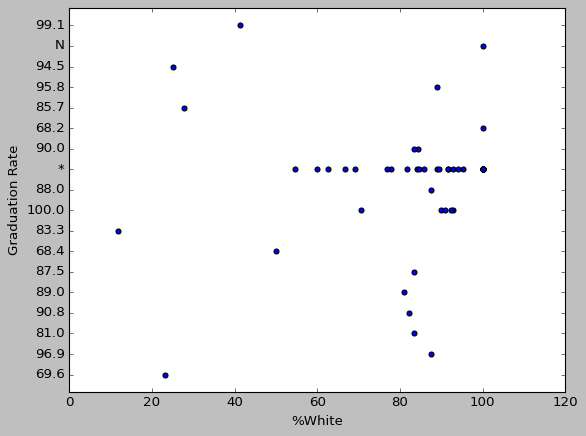

In [ ]:
#I couldn't remove the missing variables above, but here's some example scatter plots regardless.
RateIsoWhite.plot(kind='scatter', y='Graduation Rate', x='%White')

<Axes: xlabel='%Black', ylabel='Graduation Rate'>

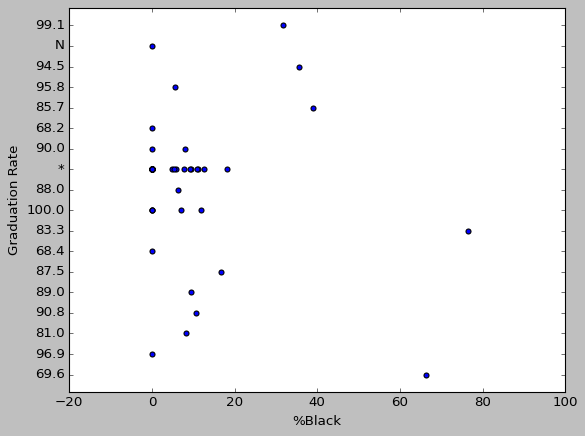

In [ ]:
RateIsoBlack.plot(kind='scatter', y='Graduation Rate', x='%Black')

In [ ]:
#Couldn't get these to work because of my inability to drop the relevant missing variable meaning pandas didn't automatically sort them by value. Will have to check in later this week, as I was unexpectedly out of town.
#Let's try showing off how much of these variables have missing data.


<Axes: xlabel='Graduation Rate'>

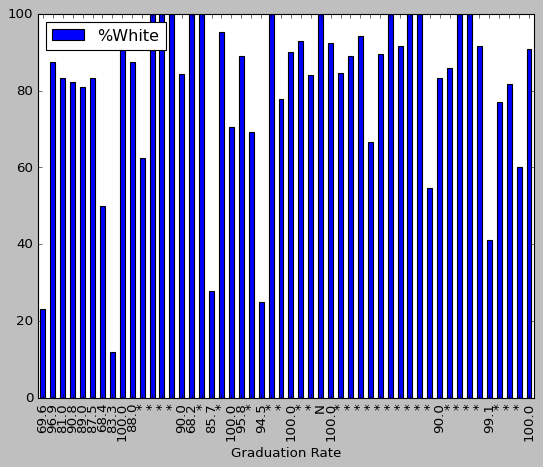

In [ ]:
RateIsoWhite.plot(kind='bar', x='Graduation Rate')

In [ ]:
#Yeah, that's about what I expected. Trying to tilt it the other way errored on non numeric variables - looks like my data was cooked from not being able to drop that. Will still try to show off what I can.

In [ ]:
#let's move onto map/recode next. I want to recode the counties into north and south jersey.
#And then, make another remapped set for those who buy into the myth of central jersey.
BlackMerged

County  District Code  \
1    Atlantic          110.0   
2    Atlantic          120.0   
5    Atlantic          590.0   
7    Atlantic         1310.0   
11   Atlantic         1790.0   
..        ...            ...   
646  Charters         7320.0   
647  Charters         7325.0   
648  Charters         7410.0   
650  Charters         7503.0   
667  Charters         8060.0   

                                              District        Position  \
1                        Atlantic City School District  Administrators   
2           Atlantic County Vocational School District  Administrators   
5                       Buena Regional School District  Administrators   
7                  Egg Harbor Township School District  Administrators   
11    Greater Egg Harbor Regional High School District  Administrators   
..                                                 ...             ...   
646                  North Star Academy Charter School  Administrators   
647                        Team Academy Charter School  Administrators   
648    Chartertech High School For The Performing Arts  Administrators   
650  Paterson Charter School For Science And Techno...  Administrators   
667             University Academy Charter High School  Administrators   

     %White  %Black  %Hispanic  %Asian  %Male  %Female  \
1      23.1    66.2        4.6     0.0   32.3     67.7   
2      87.5     0.0        0.0    12.5   75.0     25.0   
5      83.3     8.3        8.3     0.0   58.3     41.7   
7      82.1    10.7        7.1     0.0   42.9     57.1   
11     81.0     9.5        9.5     0.0   76.2     23.8   
..      ...     ...        ...     ...    ...      ...   
646    50.0    50.0        0.0     0.0   25.0     75.0   
647     0.0   100.0        0.0     0.0    0.0    100.0   
648    75.0    25.0        0.0     0.0   25.0     75.0   
650   100.0     0.0        0.0     0.0   85.7     14.3   
667    40.0    20.0       40.0     0.0   40.0     60.0   

                                         District Name School Name  \
1                        Atlantic City School District    District   
2           Atlantic County Vocational School District    District   
5                       Buena Regional School District    District   
7                  Egg Harbor Township School District    District   
11    Greater Egg Harbor Regional High School District    District   
..                                                 ...         ...   
646                  North Star Academy Charter School    District   
647                        Team Academy Charter School    District   
648    Chartertech High School For The Performing Arts    District   
650  Paterson Charter School For Science And Techno...    District   
667             University Academy Charter High School    District   

                 Student Group Graduation Rate Cohort Count Graduated _merge  
1    Black or African American            69.6          138        96   both  
2    Black or African American            96.9           65        63   both  
5    Black or African American            81.0           21        17   both  
7    Black or African American            90.8           65        59   both  
11   Black or African American            89.0          172       153   both  
..                         ...             ...          ...       ...    ...  
646  Black or African American            84.8          230       195   both  
647  Black or African American            95.1          184       175   both  
648  Black or African American            96.6           29        28   both  
650  Black or African American            97.1            *         *   both  
667  Black or African American            94.6           56        53   both  

[312 rows x 17 columns]

In [ ]:
mapping_jersey_real = {'Atlantic':'South'
                              ,'Cumberland':'South'
                              ,'Burlington':'South'
                              ,'Gloucester':'South'
                              ,'Salem':'South'
                              ,'Cape May':'South'
                              ,'Atlantic':'South'
                              ,'Camden':'South'
                              ,'Ocean' : 'South'
                              ,'Bergen':'North'
                              ,'Essex':'North'
                              ,'Hudson':'North'
                              ,'Morris':'North'
                              ,'Passaic':'North'
                              ,'Sussex':'North'
                              ,'Union':'North'
                              ,'Warren':'North'
                              ,'Mercer': 'North'
                              ,'Monmouth' : 'North'
                              ,'Middlesex':'North'
                              ,'Hunterdon':'North'
                              ,'Somerset':'North'}
BlackMergedNS = BlackMerged['County'].map(mapping_jersey_real)

In [ ]:
mapping_jersey_fake = {'Atlantic':'South'
                              ,'Cumberland':'South'
                              ,'Burlington':'South'
                              ,'Gloucester':'South'
                              ,'Salem':'South'
                              ,'Cape May':'South'
                              ,'Atlantic':'South'
                              ,'Camden':'South'
                              ,'Ocean' : 'Central'
                              ,'Bergen':'North'
                              ,'Essex':'North'
                              ,'Hudson':'North'
                              ,'Morris':'North'
                              ,'Passaic':'North'
                              ,'Sussex':'North'
                              ,'Union':'North'
                              ,'Warren':'North'
                              ,'Mercer': 'North'
                              ,'Monmouth' : 'Central'
                              ,'Middlesex':'Central'
                              ,'Hunterdon':'Central'
                              ,'Somerset':'Central'}
BlackMergedNSC = BlackMerged['County'].map(mapping_jersey_fake)

In [ ]:
BlackMergedNSC

1      South
2      South
5      South
7      South
11     South
       ...  
646      NaN
647      NaN
648      NaN
650      NaN
667      NaN
Name: County, Length: 312, dtype: object

In [ ]:
BlackMergedNS

1      South
2      South
5      South
7      South
11     South
       ...  
646      NaN
647      NaN
648      NaN
650      NaN
667      NaN
Name: County, Length: 312, dtype: object

In [ ]:
#Now I got both of them to work, but couldn't get them to stay attached to the main document on my own.
#Let's do some simple groupby and agg to make the means and standard deviations, as well as some other useful statistics.

In [ ]:
BlackMerged['Graduation Rate'].agg(['sum', 'mean'])
#Another set with problems due to the * variables. Lost more time trying to process it again.


<ipython-input-64-3ac9350680d5>:1: FutureWarning: ['mean'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  BlackMerged['Graduation Rate'].agg(['sum', 'mean'])


sum    69.696.981.090.889.087.568.483.3100.088.0****9...
Name: Graduation Rate, dtype: object

In [ ]:
BlackMerged['%Black'].agg(['sum', 'mean'])

sum     4001.700000
mean      12.825962
Name: %Black, dtype: float64

In [ ]:
agg_func_describe = {'%Black' :['describe']}
BlackMerge.groupby(['District']).agg(agg_func_describe).round(2) #aok: need to groupby sth that is a group eg county: one county has a group (a bunch of) schools

%Black                        \
                                              describe                         
                                                 count  mean std   min   25%   
District                                                                       
Absecon Public Schools District                    1.0   0.0 NaN   0.0   0.0   
Academy Charter High School                        1.0   0.0 NaN   0.0   0.0   
Academy For Urban Leadership Charter School        1.0  50.0 NaN  50.0  50.0   
Achieve Community Charter School                   1.0  83.3 NaN  83.3  83.3   
Achievers Early College Prep Charter School        1.0  83.3 NaN  83.3  83.3   
...                                                ...   ...  ..   ...   ...   
Woodland Park School District                      1.0   0.0 NaN   0.0   0.0   
Woodland Township School District                  1.0   0.0 NaN   0.0   0.0   
Woodlynne School District                          1.0  50.0 NaN  50.0  50.0   
Woodstown-Pilesgrove Regional School District      1.0  11.1 NaN  11.1  11.1   
Wyckoff Township Public School District            1.0   0.0 NaN   0.0   0.0   

                                                                 
                                                                 
                                                50%   75%   max  
District                                                         
Absecon Public Schools District                 0.0   0.0   0.0  
Academy Charter High School                     0.0   0.0   0.0  
Academy For Urban Leadership Charter School    50.0  50.0  50.0  
Achieve Community Charter School               83.3  83.3  83.3  
Achievers Early College Prep Charter School    83.3  83.3  83.3  
...                                             ...   ...   ...  
Woodland Park School District                   0.0   0.0   0.0  
Woodland Township School District               0.0   0.0   0.0  
Woodlynne School District                      50.0  50.0  50.0  
Woodstown-Pilesgrove Regional School District  11.1  11.1  11.1  
Wyckoff Township Public School District         0.0   0.0   0.0  

[664 rows x 8 columns]

In [ ]:
#Nope - lost on this. Unfortunate. Turning in what I at least tried to get done.

# can use sec names like thsi ps3

In [ ]:
#PS3 Starts here! Merging together the following datasets, all at the county level
#Graduation Rate
#Causes of death
#Food Insecurity
#Agricultural data(Pigs in specific, to serve as a later comparison for overall farm space in a region due to the space they take up)
#Simple census race statistics(Not useful for these, but will be used later to compare with administrative hiring data)
#And for the complex merge, South, North, and Central jersey election and commute times.
#None of these datasets are drawn from previous sources as was required, but most of them are useful to compare to the major DOE datasets later.

#aok:
#but need to say where the data come from like give url to the original data source

In [ ]:
pd.read_csv()

In [32]:
#DOE doesn't have the data at County level. Found a database that drew from the DOE sample to present Grad Rates at the county level.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=107VTwNv2HyDMnZk41-h0yD-5T4Nv8v2Z&export=download ", "CountyRates.xlsx")
!wget -q -O CountyRates.xlsx https://docs.google.com/uc?id=107VTwNv2HyDMnZk41-h0yD-5T4Nv8v2Z&export=download

In [33]:
# basic navigation
#wd =  'CountyRates.xlsx'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
CountyRates.xlsx  GradRate.xlsv  PerPupil.csv  sample_data  Staff.xlsv


In [34]:
dat=pd.read_excel('CountyRates.xlsx', sheet_name='Additional Measure Data',skiprows=[0,2])
#Skipping a junk row and the state level data row.

In [35]:
dat.columns

Index(['FIPS', 'State', 'County', 'Life Expectancy', '95% CI - Low',
       '95% CI - High', 'Life Expectancy (AIAN)',
       'Life Expectancy (AIAN) 95% CI - Low',
       'Life Expectancy (AIAN) 95% CI - High', 'Life Expectancy (Asian)',
       ...
       '% Hispanic', '# Non-Hispanic White', '% Non-Hispanic White',
       '# Not Proficient in English', '% Not Proficient in English',
       '95% CI - Low.21', '95% CI - High.21', '% Female', '# Rural Residents',
       '% Rural'],
      dtype='object', length=288)

In [36]:
CountyGrad=dat[['County','High School Graduation Rate']]

In [37]:
CountyGrad

County  High School Graduation Rate
0     Atlantic                    90.094340
1       Bergen                    95.283082
2   Burlington                    95.197921
3       Camden                    88.195373
4     Cape May                    91.222959
5   Cumberland                    86.446719
6        Essex                    88.256066
7   Gloucester                    92.791424
8       Hudson                    84.982456
9    Hunterdon                    95.920667
10      Mercer                    87.485762
11   Middlesex                    92.375180
12    Monmouth                    94.688806
13      Morris                    95.168138
14       Ocean                    92.722949
15     Passaic                    85.071284
16       Salem                    95.798969
17    Somerset                    94.173170
18      Sussex                    93.750149
19       Union                    88.653167
20      Warren                    92.424499

In [38]:
#Here's the causes of death in NJ with rates by county.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1GWBGqsePB4fu1PJ5dwGJonafQc43gDp8&export=download", "Death.xlsx")
!wget -q -O Death.xlsx https://docs.google.com/uc?id=1GWBGqsePB4fu1PJ5dwGJonafQc43gDp8&export=download

In [39]:
# basic navigation
#wd =  'Death.xlsx'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
CountyRates.xlsx  Death.xlsx  GradRate.xlsv  PerPupil.csv  sample_data	Staff.xlsv


In [41]:
dat=pd.read_excel('Death.xlsx',skiprows=[0,1,2,3,4,5,6], nrows=21) #aok skiprows=6 should do it

In [42]:
dat

Unnamed: 0 COVID-19 (U07.1) Septicemia (A40-41)  \
0     Atlantic               42                  24   
1    Hunterdon               **                  20   
2       Mercer               34                  48   
3    Middlesex               86                 156   
4     Monmouth               74                  98   
5       Morris               53                  78   
6        Ocean               58                 127   
7      Passaic               44                  41   
8        Salem               **                  **   
9     Somerset               35                  59   
10      Sussex               **                  16   
11      Bergen               89                 102   
12       Union               32                  68   
13      Warren               **                  15   
14  Burlington               49                  50   
15      Camden               39                  75   
16    Cape May               **                  **   
17  Cumberland               12                  27   
18       Essex               49                 111   
19  Gloucester               24                  40   
20      Hudson               38                  51   

    Cancer (malignant neoplasms) (C00-C97)  Diabetes mellitus (E10-E14)  \
0                                      365                           45   
1                                      138                           18   
2                                      387                           32   
3                                      777                           96   
4                                      722                           70   
5                                      519                           44   
6                                      965                           89   
7                                      480                           60   
8                                      106                           21   
9                                      323                           34   
10                                     184                           18   
11                                     931                           88   
12                                     484                           65   
13                                     139                           18   
14                                     557                           73   
15                                     579                           85   
16                                     183                           18   
17                                     211                           28   
18                                     667                          124   
19                                     384                           40   
20                                     395                           70   

   Parkinson's disease (G20-G21) Alzheimer's disease (G30)  \
0                             24                        54   
1                             **                        10   
2                             12                        52   
3                             40                        60   
4                             64                       116   
5                             39                        91   
6                             56                       116   
7                             28                        73   
8                             **                        **   
9                             27                        41   
10                            16                        24   
11                            70                       178   
12                            21                        72   
13                            **                        15   
14                            35                        90   
15                            40                       105   
16                            12                        37   
17                        

In [43]:
dat.columns

Index(['Unnamed: 0', 'COVID-19 (U07.1)', 'Septicemia (A40-41)',
       'Cancer (malignant neoplasms) (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Parkinson's disease (G20-G21)', 'Alzheimer's disease (G30)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Essential hypertension and hypertensive renal disease (I10,I12,I15)',
       'Stroke (cerebrovascular diseases) (I60-I69)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (CLRD) (J40-J47)',
       'Pneumonitis due to solids and liquids (J69)',
       'Chronic liver disease and cirrhosis (K70,K73-K74)',
       'Nephritis, nephrotic syndrome and nephrosis (kidney disease) (N00-N07,N17-N19,N25-N27)',
       'Unintentional injuries (V01-X59, Y85-Y86)',
       'Suicide (intentional self-harm) (X60-X84,Y87.0)',
       'Homicide (assault) (X85-Y09,Y87.1)',
       'All other coded underlying causes of death',
       'Underlying cause of death not yet coded', 'Unnamed: 20'],
      dtyp

In [49]:
#Let's slim this down to just some of the more basic variables - COVID, and Diseases of the Heart seem like they'd have things that could be compared to some of the food data we'll be looking at.
DeathCounty=dat[['Unnamed: 0','COVID-19 (U07.1)','Diseases of heart (I00-I09,I11,I13,I20-I51)']]

In [50]:
DeathCounty

Unnamed: 0 COVID-19 (U07.1)  Diseases of heart (I00-I09,I11,I13,I20-I51)
0     Atlantic               42                                          384
1    Hunterdon               **                                          141
2       Mercer               34                                          442
3    Middlesex               86                                          909
4     Monmouth               74                                          863
5       Morris               53                                          561
6        Ocean               58                                         1343
7      Passaic               44                                          499
8        Salem               **                                          102
9     Somerset               35                                          351
10      Sussex               **                                          222
11      Bergen               89                                          980
12       Union               32                                          553
13      Warren               **                                          169
14  Burlington               49                                          619
15      Camden               39                                          648
16    Cape May               **                                          179
17  Cumberland               12                                          202
18       Essex               49                                          705
19  Gloucester               24                                          384
20      Hudson               38                                          535

In [52]:
DeathCounty.rename(columns={'Unnamed: 0':'County'},inplace=True)

<ipython-input-52-55c78103f17d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DeathCounty.rename(columns={'Unnamed: 0':'County'},inplace=True)


In [51]:
DeathCounty
#Rennamed for the merge.
#aok could fix the missing code of ** by replacing it with np.nan

Unnamed: 0 COVID-19 (U07.1)  Diseases of heart (I00-I09,I11,I13,I20-I51)
0     Atlantic               42                                          384
1    Hunterdon               **                                          141
2       Mercer               34                                          442
3    Middlesex               86                                          909
4     Monmouth               74                                          863
5       Morris               53                                          561
6        Ocean               58                                         1343
7      Passaic               44                                          499
8        Salem               **                                          102
9     Somerset               35                                          351
10      Sussex               **                                          222
11      Bergen               89                                          980
12       Union               32                                          553
13      Warren               **                                          169
14  Burlington               49                                          619
15      Camden               39                                          648
16    Cape May               **                                          179
17  Cumberland               12                                          202
18       Essex               49                                          705
19  Gloucester               24                                          384
20      Hudson               38                                          535

In [53]:
#Rates of Food Insecurity in NJ by County
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1vJIna5IDtbaLUKpXiGKfd6u9FHU8_BZI&export=download ", "FoodInsec.xlsx")
!wget -q -O FoodInsec.xlsx https://docs.google.com/uc?id=1vJIna5IDtbaLUKpXiGKfd6u9FHU8_BZI&export=download

In [54]:
# basic navigation
#wd =  'FoodInsec.xlsx'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
CountyRates.xlsx  Death.xlsx  FoodInsec.xlsx  GradRate.xlsv  PerPupil.csv  sample_data	Staff.xlsv


In [55]:
dat=pd.read_excel('FoodInsec.xlsx',
                   sheet_name='County',
                   header=0,
                   skiprows=lambda a: (a > 0 and (a < 1776 or a > 1796)) )
#My tutor saw that the data I wanted to work with had the data and I wanted 1700 entries deep, and only 21 of the total 30000 entries
#Said "I can help you but this will be some WEIRD stuff"
#And proceeded to curse me out for the next 5 minutes as he guided me through how to write this section.
#I added the context here because this is a little beyond what I think you were expecting us to do here.

In [56]:
dat
#Reading in the County level data went fine, but we've got too many variables. Let's run our list and slim.

FIPS State                  County, State  Year  \
0   34001    NJ    Atlantic County, New Jersey  2021   
1   34003    NJ      Bergen County, New Jersey  2021   
2   34005    NJ  Burlington County, New Jersey  2021   
3   34007    NJ      Camden County, New Jersey  2021   
4   34009    NJ    Cape May County, New Jersey  2021   
5   34011    NJ  Cumberland County, New Jersey  2021   
6   34013    NJ       Essex County, New Jersey  2021   
7   34015    NJ  Gloucester County, New Jersey  2021   
8   34017    NJ      Hudson County, New Jersey  2021   
9   34019    NJ   Hunterdon County, New Jersey  2021   
10  34021    NJ      Mercer County, New Jersey  2021   
11  34023    NJ   Middlesex County, New Jersey  2021   
12  34025    NJ    Monmouth County, New Jersey  2021   
13  34027    NJ      Morris County, New Jersey  2021   
14  34029    NJ       Ocean County, New Jersey  2021   
15  34031    NJ     Passaic County, New Jersey  2021   
16  34033    NJ       Salem County, New Jersey  2021   
17  34035    NJ    Somerset County, New Jersey  2021   
18  34037    NJ      Sussex County, New Jersey  2021   
19  34039    NJ       Union County, New Jersey  2021   
20  34041    NJ      Warren County, New Jersey  2021   

    Overall Food Insecurity Rate  # of Food Insecure Persons Overall  \
0                          0.112                               30810   
1                          0.067                               64240   
2                          0.056                               25920   
3                          0.091                               47500   
4                          0.099                                9450   
5                          0.104                               16080   
6                          0.099                               84450   
7                          0.066                               19880   
8                          0.110                               78150   
9                          0.046                                5910   
10                         0.072                               27740   
11                         0.070                               60310   
12                         0.064                               41230   
13                         0.057                               28760   
14                         0.083                               52300   
15                         0.104                               54310   
16                         0.100                                6480   
17                         0.049                               16750   
18                         0.061                                8870   
19                         0.067                               38470   
20                         0.076                                8350   

    Food Insecurity Rate among Black Persons (all ethnicities)  \
0                                                0.20            
1                                                0.11            
2                                                0.09            
3                                                0.16            
4                                                0.20            
5                                                0.22            
6                                                0.21            
7                                                0.14            
8                                                0.19            
9                                                0.08            
10                                               0.18            
11                                               0.11            
12                                               0.14            
13                                               0.10            
14                                               0.12            
15                                               0.20            
16                                               0.21            

In [ ]:
dat.columns

Index(['FIPS', 'State', 'County, State', 'Year',
       'Overall Food Insecurity Rate', '# of Food Insecure Persons Overall',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       '% FI > Low Threshold', 'Child Food Insecurity Rate',
       '# of Food Insecure Children',
       '% food insecure children in HH w/ HH incomes below 185 FPL',
       '% food insecure children in HH w/ HH incomes above 185 FPL',
       'Cost Per Meal', 'Weighted weekly $ needed by FI',
       'Weighted Annual Food Budget Shortfall'],
      dtype='object')

In [58]:
FoodInsecClean=dat[['County, State','Overall Food Insecurity Rate', '# of Food Insecure Persons Overall',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ', '# of Food Insecure Children']]

In [59]:
FoodInsecClean
#Now there's only one issue - the 'County, New Jersey' tagged onto the end of each of these will make it so they don't merge

County, State  Overall Food Insecurity Rate  \
0     Atlantic County, New Jersey                         0.112   
1       Bergen County, New Jersey                         0.067   
2   Burlington County, New Jersey                         0.056   
3       Camden County, New Jersey                         0.091   
4     Cape May County, New Jersey                         0.099   
5   Cumberland County, New Jersey                         0.104   
6        Essex County, New Jersey                         0.099   
7   Gloucester County, New Jersey                         0.066   
8       Hudson County, New Jersey                         0.110   
9    Hunterdon County, New Jersey                         0.046   
10      Mercer County, New Jersey                         0.072   
11   Middlesex County, New Jersey                         0.070   
12    Monmouth County, New Jersey                         0.064   
13      Morris County, New Jersey                         0.057   
14       Ocean County, New Jersey                         0.083   
15     Passaic County, New Jersey                         0.104   
16       Salem County, New Jersey                         0.100   
17    Somerset County, New Jersey                         0.049   
18      Sussex County, New Jersey                         0.061   
19       Union County, New Jersey                         0.067   
20      Warren County, New Jersey                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                                8870   
19                               38470   
20                                8350   

    Food Insecurity Rate among Black Persons (all ethnicities)  \
0                                                0.20            
1                                                0.11            
2                                                0.09            
3                                                0.16            
4                                                0.20            
5                                                0.22            
6                                                0.21            
7                                                0.14            
8                                                0.19            
9                                                0.08            
10                                               0.18            
11                                               0.11            
12                                               0.14            
13                                               0.10            
14                                               0.12            
15                                               0.20            
16                                               0.21            
17                                               0.07            
18                                               0.06            
19                                               0.13            
20                                               0.10            

    Food Insecurity Rate among Hispanic Persons (any race)  \
0                                                0.19        
1                                          

In [61]:
FoodInsec = FoodInsecClean.replace(to_replace=" County, New Jersey", value="", regex=True)
#This should chop just that part off and leave us with a mergable variable.
#aok: nice!

In [ ]:
FoodInsec
#Perfect. All of the variables preserved in a mergable state.

County, State  Overall Food Insecurity Rate  \
0       Atlantic                         0.112   
1         Bergen                         0.067   
2     Burlington                         0.056   
3         Camden                         0.091   
4       Cape May                         0.099   
5     Cumberland                         0.104   
6          Essex                         0.099   
7     Gloucester                         0.066   
8         Hudson                         0.110   
9      Hunterdon                         0.046   
10        Mercer                         0.072   
11     Middlesex                         0.070   
12      Monmouth                         0.064   
13        Morris                         0.057   
14         Ocean                         0.083   
15       Passaic                         0.104   
16         Salem                         0.100   
17      Somerset                         0.049   
18        Sussex                         0.061   
19         Union                         0.067   
20        Warren                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                                8870   
19                               38470   
20                                8350   

    Food Insecurity Rate among Black Persons (all ethnicities)  \
0                                                0.20            
1                                                0.11            
2                                                0.09            
3                                                0.16            
4                                                0.20            
5                                                0.22            
6                                                0.21            
7                                                0.14            
8                                                0.19            
9                                                0.08            
10                                               0.18            
11                                               0.11            
12                                               0.14            
13                                               0.10            
14                                               0.12            
15                                               0.20            
16                                               0.21            
17                                               0.07            
18                                               0.06            
19                                               0.13            
20                                               0.10            

    Food Insecurity Rate among Hispanic Persons (any race)  \
0                                                0.19        
1                                                0.12        
2                                                0.13        
3                                                0.19        
4                                                0.16        
5                                                0.17        
6                                                0.17        
7                           

In [62]:
FoodInsec.rename(columns={'County, State':'County'},inplace=True)
#Changing the column name for merging.

In [63]:
FoodInsec

County  Overall Food Insecurity Rate  \
0     Atlantic                         0.112   
1       Bergen                         0.067   
2   Burlington                         0.056   
3       Camden                         0.091   
4     Cape May                         0.099   
5   Cumberland                         0.104   
6        Essex                         0.099   
7   Gloucester                         0.066   
8       Hudson                         0.110   
9    Hunterdon                         0.046   
10      Mercer                         0.072   
11   Middlesex                         0.070   
12    Monmouth                         0.064   
13      Morris                         0.057   
14       Ocean                         0.083   
15     Passaic                         0.104   
16       Salem                         0.100   
17    Somerset                         0.049   
18      Sussex                         0.061   
19       Union                         0.067   
20      Warren                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                                8870   
19                               38470   
20                                8350   

    Food Insecurity Rate among Black Persons (all ethnicities)  \
0                                                0.20            
1                                                0.11            
2                                                0.09            
3                                                0.16            
4                                                0.20            
5                                                0.22            
6                                                0.21            
7                                                0.14            
8                                                0.19            
9                                                0.08            
10                                               0.18            
11                                               0.11            
12                                               0.14            
13                                               0.10            
14                                               0.12            
15                                               0.20            
16                                               0.21            
17                                               0.07            
18                                               0.06            
19                                               0.13            
20                                               0.10            

    Food Insecurity Rate among Hispanic Persons (any race)  \
0                                                0.19        
1                                                0.12        
2                                                0.13        
3                                                0.19        
4                                                0.16        
5                                                0.17        
6                                                0.17        
7                                                0.14        
8              

In [64]:
#Some basic agricultural data - filtered down to just pigs. In future, will do multiple merges to pull in all livestock data into one databank
#The state's website limits it to only a certain number of entries per pull, so I'll have to stitch them together to get the numbers I want
#It notably doesn't include every County in the state, so we'll be missing a few later on - specificially Bergen, Hudson, and Union.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1HC2Z7yNDjQ8x8Bbk6BXMGiwzVlmD0sDX&export=download ", "Hogs.csv")
!wget -q -O Hogs.csv https://docs.google.com/uc?id=1HC2Z7yNDjQ8x8Bbk6BXMGiwzVlmD0sDX&export=download

In [65]:
# basic navigation
#wd =  'FoodInsec.xlsx'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
CountyRates.xlsx  FoodInsec.xlsx  Hogs.csv	sample_data
Death.xlsx	  GradRate.xlsv   PerPupil.csv	Staff.xlsv


In [66]:
dat=pd.read_csv('Hogs.csv')

In [67]:
dat.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

In [68]:
HogsClean=dat[['Year','County','Value','CV (%)']]

In [69]:
HogsClean

Year      County   Value CV (%)
0    2017  BURLINGTON   2,025   32.3
1    2017      MERCER     (D)    (D)
2    2017   MIDDLESEX     (D)    (D)
3    2017    MONMOUTH      51   32.3
4    2017       OCEAN     314   32.3
..    ...         ...     ...    ...
534  1971    ATLANTIC   1,300    NaN
535  1971      CAMDEN   1,000    NaN
536  1971    CAPE MAY   4,700    NaN
537  1971  CUMBERLAND   1,200    NaN
538  1971  GLOUCESTER  48,900    NaN

[539 rows x 4 columns]

In [70]:
#Restricted down to the useful bits we needed. Now let's narrow it down to one year! If I wanted, I code do this multiple times and then remerge them so their more comparable line wise.
#No ' around 2017 because it's a number.
Hogs2017=HogsClean[dat['Year']==2017]

In [71]:
Hogs2017
#Perfect. The missing variables represent counties with no hogs - I know how to filter that out to a 0 but haven't here because I want to do it on a larger scale when I have them all together.
#Looks good - but, we can't merge these with the Counties capitalized. Looks like we'll have to filter them back to title case.

Year      County  Value CV (%)
0   2017  BURLINGTON  2,025   32.3
1   2017      MERCER    (D)    (D)
2   2017   MIDDLESEX    (D)    (D)
3   2017    MONMOUTH     51   32.3
4   2017       OCEAN    314   32.3
5   2017       ESSEX      3   32.3
6   2017   HUNTERDON    761   32.3
7   2017      MORRIS    165   32.3
8   2017     PASSAIC     42   32.3
9   2017    SOMERSET    919   32.3
10  2017      SUSSEX    535   32.3
11  2017      WARREN    502   32.3
12  2017    ATLANTIC    (D)    (D)
13  2017      CAMDEN    (D)    (D)
14  2017    CAPE MAY    665   32.3
15  2017  CUMBERLAND    113   32.3
16  2017  GLOUCESTER    939   32.3
17  2017       SALEM    428   32.3

In [72]:
Hogs2017["County"]=Hogs2017["County"].str.title()

<ipython-input-72-b43a22728675>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hogs2017["County"]=Hogs2017["County"].str.title()


In [73]:
Hogs2017

Year      County  Value CV (%)
0   2017  Burlington  2,025   32.3
1   2017      Mercer    (D)    (D)
2   2017   Middlesex    (D)    (D)
3   2017    Monmouth     51   32.3
4   2017       Ocean    314   32.3
5   2017       Essex      3   32.3
6   2017   Hunterdon    761   32.3
7   2017      Morris    165   32.3
8   2017     Passaic     42   32.3
9   2017    Somerset    919   32.3
10  2017      Sussex    535   32.3
11  2017      Warren    502   32.3
12  2017    Atlantic    (D)    (D)
13  2017      Camden    (D)    (D)
14  2017    Cape May    665   32.3
15  2017  Cumberland    113   32.3
16  2017  Gloucester    939   32.3
17  2017       Salem    428   32.3

In [74]:
#Loading in the Census Race data for comparison's death
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1_QQGO7UjmWJUp8m-CieMkLe4G1cYK4mI&export=download ", "Census.csv")
!wget -q -O Census.csv https://docs.google.com/uc?id=1_QQGO7UjmWJUp8m-CieMkLe4G1cYK4mI&export=download

In [75]:
# basic navigation
#wd =  'FoodInsec.xlsx'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
Census.csv	  Death.xlsx	  GradRate.xlsv  PerPupil.csv  Staff.xlsv
CountyRates.xlsx  FoodInsec.xlsx  Hogs.csv	 sample_data


In [76]:
dat=pd.read_csv('Census.csv',skiprows=1)

In [77]:
dat

Geography           Geographic Area Name   !!Total:  \
0   0500000US34001    Atlantic County, New Jersey     274534   
1   0500000US34003      Bergen County, New Jersey     955732   
2   0500000US34005  Burlington County, New Jersey     461860   
3   0500000US34007      Camden County, New Jersey     523485   
4   0500000US34009    Cape May County, New Jersey      95263   
5   0500000US34011  Cumberland County, New Jersey     154152   
6   0500000US34013       Essex County, New Jersey     863728   
7   0500000US34015  Gloucester County, New Jersey     302294   
8   0500000US34017      Hudson County, New Jersey     724854   
9   0500000US34019   Hunterdon County, New Jersey     128947   
10  0500000US34021      Mercer County, New Jersey     387340   
11  0500000US34023   Middlesex County, New Jersey     863162   
12  0500000US34025    Monmouth County, New Jersey     643615   
13  0500000US34027      Morris County, New Jersey     509285   
14  0500000US34029       Ocean County, New Jersey     637229   
15  0500000US34031     Passaic County, New Jersey     524118   
16  0500000US34033       Salem County, New Jersey      64837   
17  0500000US34035    Somerset County, New Jersey     345361   
18  0500000US34037      Sussex County, New Jersey     144221   
19  0500000US34039       Union County, New Jersey     575345   
20  0500000US34041      Warren County, New Jersey     109632   

    Annotation of  !!Total:   !!Total:!!Population of one race:  \
0                       NaN                              248886   
1                       NaN                              858445   
2                       NaN                              424520   
3                       NaN                              480854   
4                       NaN                               89588   
5                       NaN                              135746   
6                       NaN                              773192   
7                       NaN                              281793   
8                       NaN                              620369   
9                       NaN                              120088   
10                      NaN                              354197   
11                      NaN                              784897   
12                      NaN                              592279   
13                      NaN                              462546   
14                      NaN                              594877   
15                      NaN                              459499   
16                      NaN                               60160   
17                      NaN                              314122   
18                      NaN                              132794   
19                      NaN                              496134   
20                      NaN                              100514   

    Annotation of  !!Total:!!Population of one race:  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                                                NaN   
8                                                NaN   
9                                                NaN   
10                                               NaN   
11                                               NaN   
12                                               NaN   
13                                               NaN   
14                                               NaN   
15                                               NaN   
16                                               NaN   
17                                               NaN   
18                                               NaN   
19   

In [78]:
dat.columns

Index(['Geography', 'Geographic Area Name', ' !!Total:',
       'Annotation of  !!Total:', ' !!Total:!!Population of one race:',
       'Annotation of  !!Total:!!Population of one race:',
       ' !!Total:!!Population of one race:!!White alone',
       'Annotation of  !!Total:!!Population of one race:!!White alone',
       ' !!Total:!!Population of one race:!!Black or African American alone',
       'Annotation of  !!Total:!!Population of one race:!!Black or African American alone',
       ...
       'Annotation of  !!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       ' !!Total:!!Population of two or more races:!!Population of five races:!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Annotation of  !!Total:!!Population of two or more races:!!Population of five races:!!White; American Ind

In [79]:
CensusWhiteBlackUncut=dat[['Geographic Area Name',' !!Total:!!Population of one race:!!White alone',' !!Total:!!Population of one race:!!Black or African American alone']]

In [80]:
CensusWhiteBlackUncut
#Same issue with Foodinsec. Luckily, we have the exact code written out already!

Geographic Area Name  \
0     Atlantic County, New Jersey   
1       Bergen County, New Jersey   
2   Burlington County, New Jersey   
3       Camden County, New Jersey   
4     Cape May County, New Jersey   
5   Cumberland County, New Jersey   
6        Essex County, New Jersey   
7   Gloucester County, New Jersey   
8       Hudson County, New Jersey   
9    Hunterdon County, New Jersey   
10      Mercer County, New Jersey   
11   Middlesex County, New Jersey   
12    Monmouth County, New Jersey   
13      Morris County, New Jersey   
14       Ocean County, New Jersey   
15     Passaic County, New Jersey   
16       Salem County, New Jersey   
17    Somerset County, New Jersey   
18      Sussex County, New Jersey   
19       Union County, New Jersey   
20      Warren County, New Jersey   

     !!Total:!!Population of one race:!!White alone  \
0                                            156796   
1                                            543849   
2                                            303024   
3                                            293198   
4                                             81536   
5                                             74606   
6                                            261487   
7                                            230313   
8                                            248561   
9                                            106790   
10                                           178447   
11                                           361742   
12                                           476056   
13                                           354824   
14                                           534036   
15                                           229573   
16                                            46600   
17                                           185499   
18                                           121879   
19                                           236589   
20                                            86875   

     !!Total:!!Population of one race:!!Black or African American alone  
0                                               41519                    
1                                               54831                    
2                                               77749                    
3                                              101109                    
4                                                3567                    
5                                               28581                    
6                                              335047                    
7                                               32992                    
8                                               79498                    
9                                                3174                    
10                                              74993                    
11                                              84360                    
12                                              41124                    
13                                              16669                    
14                                              19079                    
15                                              57809                    
16                                               9534                    
17                                              31842                    
18                                               3088                    
19                                             117306                    
20                                               5899

In [81]:
CensusWhiteBlack = CensusWhiteBlackUncut.replace(to_replace=" County, New Jersey", value="", regex=True)

In [82]:
CensusWhiteBlack
#And that's our five done for our basic merge. Let's stitch these all together before doing the complex.

Geographic Area Name   !!Total:!!Population of one race:!!White alone  \
0              Atlantic                                           156796   
1                Bergen                                           543849   
2            Burlington                                           303024   
3                Camden                                           293198   
4              Cape May                                            81536   
5            Cumberland                                            74606   
6                 Essex                                           261487   
7            Gloucester                                           230313   
8                Hudson                                           248561   
9             Hunterdon                                           106790   
10               Mercer                                           178447   
11            Middlesex                                           361742   
12             Monmouth                                           476056   
13               Morris                                           354824   
14                Ocean                                           534036   
15              Passaic                                           229573   
16                Salem                                            46600   
17             Somerset                                           185499   
18               Sussex                                           121879   
19                Union                                           236589   
20               Warren                                            86875   

     !!Total:!!Population of one race:!!Black or African American alone  
0                                               41519                    
1                                               54831                    
2                                               77749                    
3                                              101109                    
4                                                3567                    
5                                               28581                    
6                                              335047                    
7                                               32992                    
8                                               79498                    
9                                                3174                    
10                                              74993                    
11                                              84360                    
12                                              41124                    
13                                              16669                    
14                                              19079                    
15                                              57809                    
16                                               9534                    
17                                              31842                    
18                                               3088                    
19                                             117306                    
20                                               5899

In [83]:
CensusWhiteBlack.rename(columns={'Geographic Area Name':'County'},inplace=True)
#Changing the column name for merging.

In [84]:
CensusWhiteBlack

County   !!Total:!!Population of one race:!!White alone  \
0     Atlantic                                           156796   
1       Bergen                                           543849   
2   Burlington                                           303024   
3       Camden                                           293198   
4     Cape May                                            81536   
5   Cumberland                                            74606   
6        Essex                                           261487   
7   Gloucester                                           230313   
8       Hudson                                           248561   
9    Hunterdon                                           106790   
10      Mercer                                           178447   
11   Middlesex                                           361742   
12    Monmouth                                           476056   
13      Morris                                           354824   
14       Ocean                                           534036   
15     Passaic                                           229573   
16       Salem                                            46600   
17    Somerset                                           185499   
18      Sussex                                           121879   
19       Union                                           236589   
20      Warren                                            86875   

     !!Total:!!Population of one race:!!Black or African American alone  
0                                               41519                    
1                                               54831                    
2                                               77749                    
3                                              101109                    
4                                                3567                    
5                                               28581                    
6                                              335047                    
7                                               32992                    
8                                               79498                    
9                                                3174                    
10                                              74993                    
11                                              84360                    
12                                              41124                    
13                                              16669                    
14                                              19079                    
15                                              57809                    
16                                               9534                    
17                                              31842                    
18                                               3088                    
19                                             117306                    
20                                               5899

In [85]:
 GradDeath = pd.merge(CountyGrad, DeathCounty, how='left', on=['County'], indicator=True)
 #Noting all five of my datasets in order and their variable names for proper merging - 'CountyGrad', 'DeathCounty', 'FoodInsec', 'Hogs2017', 'CensusWhiteBlack'

In [86]:
GradDeath
#Grad rates and death merged off of county!

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959               **   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667               **   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969               **   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149               **   
19       Union                    88.653167               32   
20      Warren                    92.424499               **   

    Diseases of heart (I00-I09,I11,I13,I20-I51) _merge  
0                                           384   both  
1                                           980   both  
2                                           619   both  
3                                           648   both  
4                                           179   both  
5                                           202   both  
6                                           705   both  
7                                           384   both  
8                                           535   both  
9                                           141   both  
10                                          442   both  
11                                          909   both  
12                                          863   both  
13                                          561   both  
14                                         1343   both  
15                                          499   both  
16                                          102   both  
17                                          351   both  
18                                          222   both  
19                                          553   both  
20                                          169   both

In [87]:
GradDeathClean=GradDeath[['County', 'High School Graduation Rate', 'COVID-19 (U07.1)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)']]

In [88]:
GradDeathClean["County"] == FoodInsec["County"]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
Name: County, dtype: bool

In [93]:
 GradDeathFood = pd.merge(GradDeathClean, FoodInsec, how='left', on=['County'], indicator=True)


In [94]:
GradDeathFood
#Worked! This one took 30 minutes for reasons I don't want to elaborate on out of fear of looking stupid.

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959               **   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667               **   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969               **   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149               **   
19       Union                    88.653167               32   
20      Warren                    92.424499               **   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           980                         0.067   
2                                           619                         0.056   
3                                           648                         0.091   
4                                           179                         0.099   
5                                           202                         0.104   
6                                           705                         0.099   
7                                           384                         0.066   
8                                           535                         0.110   
9                                           141                         0.046   
10                                          442                         0.072   
11                                          909                         0.070   
12                                          863                         0.064   
13                                          561                         0.057   
14                                         1343                         0.083   
15                                          499                         0.104   
16                                          102                         0.100   
17                                          351                         0.049   
18                                          222                         0.061   
19                                          553                         0.067   
20                                          169                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                

In [95]:
 GradDeathFoodAgri = pd.merge(GradDeathFood, Hogs2017, how='outer', on=['County'], indicator=False)

In [96]:
GradDeathFoodAgri

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959               **   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667               **   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969               **   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149               **   
19       Union                    88.653167               32   
20      Warren                    92.424499               **   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           980                         0.067   
2                                           619                         0.056   
3                                           648                         0.091   
4                                           179                         0.099   
5                                           202                         0.104   
6                                           705                         0.099   
7                                           384                         0.066   
8                                           535                         0.110   
9                                           141                         0.046   
10                                          442                         0.072   
11                                          909                         0.070   
12                                          863                         0.064   
13                                          561                         0.057   
14                                         1343                         0.083   
15                                          499                         0.104   
16                                          102                         0.100   
17                                          351                         0.049   
18                                          222                         0.061   
19                                          553                         0.067   
20                                          169                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                

In [97]:
 GradDeathFoodAgriRace = pd.merge(GradDeathFoodAgri, CensusWhiteBlack, how='outer', on=['County'], indicator=False)

In [98]:
 GradDeathFoodAgriRace
 #And that's all five of our basic datasets merged. Let's do some mapping to assign South/Central/North jersey to these, and add on our one to many merge.

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959               **   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667               **   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969               **   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149               **   
19       Union                    88.653167               32   
20      Warren                    92.424499               **   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           980                         0.067   
2                                           619                         0.056   
3                                           648                         0.091   
4                                           179                         0.099   
5                                           202                         0.104   
6                                           705                         0.099   
7                                           384                         0.066   
8                                           535                         0.110   
9                                           141                         0.046   
10                                          442                         0.072   
11                                          909                         0.070   
12                                          863                         0.064   
13                                          561                         0.057   
14                                         1343                         0.083   
15                                          499                         0.104   
16                                          102                         0.100   
17                                          351                         0.049   
18                                          222                         0.061   
19                                          553                         0.067   
20                                          169                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                

In [99]:
#Uploading in some housing, election, and commuting data for Central, South, and North jersey.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1t6lGdflgCdisu5EzohDSMA2GmEx5MlVZ&export=download  ", "SCN.csv")
!wget -q -O SCN.csv https://docs.google.com/uc?id=1t6lGdflgCdisu5EzohDSMA2GmEx5MlVZ&export=download

In [ ]:
# basic navigation
#wd =  'FoodInsec.xlsx'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
Census.csv	  Death.xlsx	  GradRate.xlsv  PerPupil.csv  SCN.csv
CountyRates.xlsx  FoodInsec.xlsx  Hogs.csv	 sample_data   Staff.xlsv


In [100]:
dat=pd.read_csv('SCN.csv')

In [101]:
dat
#Looks good, no major edits needed, and I like all of the variables for future use.

Section  Population (2013)  Total Area (Sq. mi)  Ave. Commute (Min)  \
0  Northern            3866532              2274.79               31.73   
1   Central            3042937              2212.66               31.12   
2  Southern            1922937              3355.68               26.73   

   Ave. Property Taxes  Ave. Property Value  % Votes for Christie (2013)  
0                 9737               393672                           57  
1                 8437               370264                           64  
2                 5757               253866                           63

In [102]:
SCNCommuteElection=dat

In [103]:
SCNCommuteElection
#Pulling this out into it's own dataset to not cause any conflicts.

Section  Population (2013)  Total Area (Sq. mi)  Ave. Commute (Min)  \
0  Northern            3866532              2274.79               31.73   
1   Central            3042937              2212.66               31.12   
2  Southern            1922937              3355.68               26.73   

   Ave. Property Taxes  Ave. Property Value  % Votes for Christie (2013)  
0                 9737               393672                           57  
1                 8437               370264                           64  
2                 5757               253866                           63

In [104]:
mapping_jersey_SCN = {'Atlantic':'Southern'
                              ,'Cumberland':'Southern'
                              ,'Burlington':'Southern'
                              ,'Gloucester':'Southern'
                              ,'Salem':'Southern'
                              ,'Cape May':'Southern'
                              ,'Atlantic':'Southern'
                              ,'Camden':'Southern'
                              ,'Ocean' : 'Central'
                              ,'Bergen':'Northern'
                              ,'Essex':'Northern'
                              ,'Hudson':'Northern'
                              ,'Morris':'Northern'
                              ,'Passaic':'Northern'
                              ,'Sussex':'Northern'
                              ,'Union':'Northern'
                              ,'Warren':'Northern'
                              ,'Mercer': 'Northern'
                              ,'Monmouth' : 'Central'
                              ,'Middlesex':'Central'
                              ,'Hunterdon':'Central'
                              ,'Somerset':'Central'}

In [105]:
GradDeathFoodAgriRace["SCN"]=GradDeathFoodAgriRace["County"].map(mapping_jersey_SCN)

In [106]:
GradDeathFoodAgriRace
#Mapping on Southern, Northern, and Central as a new attribute using the map I made earlier in the semester.
#I had intended to use the Agricultural data, as it has this attribute built in, but since it's missing counties
#I had to make my own and attach it.

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959               **   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667               **   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969               **   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149               **   
19       Union                    88.653167               32   
20      Warren                    92.424499               **   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           980                         0.067   
2                                           619                         0.056   
3                                           648                         0.091   
4                                           179                         0.099   
5                                           202                         0.104   
6                                           705                         0.099   
7                                           384                         0.066   
8                                           535                         0.110   
9                                           141                         0.046   
10                                          442                         0.072   
11                                          909                         0.070   
12                                          863                         0.064   
13                                          561                         0.057   
14                                         1343                         0.083   
15                                          499                         0.104   
16                                          102                         0.100   
17                                          351                         0.049   
18                                          222                         0.061   
19                                          553                         0.067   
20                                          169                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                

In [110]:
SCNCommuteElection

Section  Population (2013)  Total Area (Sq. mi)  Ave. Commute (Min)  \
0  Northern            3866532              2274.79               31.73   
1   Central            3042937              2212.66               31.12   
2  Southern            1922937              3355.68               26.73   

   Ave. Property Taxes  Ave. Property Value  % Votes for Christie (2013)  
0                 9737               393672                           57  
1                 8437               370264                           64  
2                 5757               253866                           63

In [107]:
SCN5Merge=pd.merge(GradDeathFoodAgriRace,SCNCommuteElection, how="left", left_on="SCN", right_on="Section",validate="m:1")
#aok: ok fine it did work out here but again always first do merge with outer option

In [ ]:
SCN5Merge

County  High School Graduation Rate COVID-19 (U07.1)  \
0     Atlantic                    90.094340               42   
1       Bergen                    95.283082               89   
2   Burlington                    95.197921               49   
3       Camden                    88.195373               39   
4     Cape May                    91.222959               **   
5   Cumberland                    86.446719               12   
6        Essex                    88.256066               49   
7   Gloucester                    92.791424               24   
8       Hudson                    84.982456               38   
9    Hunterdon                    95.920667               **   
10      Mercer                    87.485762               34   
11   Middlesex                    92.375180               86   
12    Monmouth                    94.688806               74   
13      Morris                    95.168138               53   
14       Ocean                    92.722949               58   
15     Passaic                    85.071284               44   
16       Salem                    95.798969               **   
17    Somerset                    94.173170               35   
18      Sussex                    93.750149               **   
19       Union                    88.653167               32   
20      Warren                    92.424499               **   

    Diseases of heart (I00-I09,I11,I13,I20-I51)  Overall Food Insecurity Rate  \
0                                           384                         0.112   
1                                           980                         0.067   
2                                           619                         0.056   
3                                           648                         0.091   
4                                           179                         0.099   
5                                           202                         0.104   
6                                           705                         0.099   
7                                           384                         0.066   
8                                           535                         0.110   
9                                           141                         0.046   
10                                          442                         0.072   
11                                          909                         0.070   
12                                          863                         0.064   
13                                          561                         0.057   
14                                         1343                         0.083   
15                                          499                         0.104   
16                                          102                         0.100   
17                                          351                         0.049   
18                                          222                         0.061   
19                                          553                         0.067   
20                                          169                         0.076   

    # of Food Insecure Persons Overall  \
0                                30810   
1                                64240   
2                                25920   
3                                47500   
4                                 9450   
5                                16080   
6                                84450   
7                                19880   
8                                78150   
9                                 5910   
10                               27740   
11                               60310   
12                               41230   
13                               28760   
14                               52300   
15                               54310   
16                                6480   
17                               16750   
18                

In [ ]:
SCN5Merge.columns

Index(['County', 'High School Graduation Rate', 'COVID-19 (U07.1)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Overall Food Insecurity Rate', '# of Food Insecure Persons Overall',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       '# of Food Insecure Children', '_merge', 'Year', 'Value', 'CV (%)',
       ' !!Total:!!Population of one race:!!White alone',
       ' !!Total:!!Population of one race:!!Black or African American alone',
       'SCN', 'Section', 'Population (2013)', 'Total Area (Sq. mi)',
       'Ave. Commute (Min)', 'Ave. Property Taxes', 'Ave. Property Value',
       '% Votes for Christie (2013)'],
      dtype='object')

In [ ]:
#Everything preserved! Looks good and means I can preform some more experimentation on it in the future.
#Some minor things I'll need to fix before preforming descriptive stats on it - IE, replacing missing variables with 0s and such, but I'm happy with this where it is.
